# Фильтрация изображений в частотной области

## Линейные фильтры
**Линейная система** - это такая система, для которой отклик на сумму входных сигналов равен сумме откликов на эти сигналы по отдельности (принцип суперпозиции). Примером может являться **линейный фильтр**, при использовании которого к входному сигналу применяется некоторый линейный оператор; предназначен фильтр для выделения или подавления некоторого сигнала или нужной части спектра.

При линейной фильтрации изображения каждый выходной пиксель равен взвешенной сумме пикселей в пределах некоторой области исходной картинки. Иными словами, мы вычисляем **дискретную свертку**:

$$g(x, y)= f(x, y) * h(x, y) = \sum_{m=-a}^{m=a}\sum_{n=-b}^{n=b}f(m, n)h(x-m, y-n)= \sum_{m=-a}^{m=a}\sum_{n=-b}^{n=b}f(x-m, y-n)h(m, n).$$

Здесь $f(x,y)$, $g(x,y)$ - исходное и выходное изображения, $h(x, y)$ называют **ядром фильтра**, $a=\frac{M-1}{2}$, $b=\frac{N-1}{2}$, $M$, $N$ - размерности ядра.

**Теорема о свертке** утверждает, что свертка двух функций (например, изображений) в пространственной области и произведение их Фурье-образов образуют Фурье-пару:
$$
f(x, y) * h(x, y) \Leftrightarrow \mathcal{F}\{{f(x, y)}\} \mathcal{F}\{{h(x, y)}\}.
$$
Здесь двойная стрелка означает, что выражение в левой части получается обратным Фурье-преобразованием выражения в правой части.

Фильтрацию изображений можно производить как в пространственной, так и в частотной области. В этом задании вы познакомитесь с особенностями **фильтрации в частотной области**.

## Фильтр нижних частот

- На изображении визуально виден периодический шум. Используя функцию `np.fft.fft2()` отобразите двумерный спектр картинки. Спектр должен быть центрирован, т.е. нулевая частота должна находиться в центре спектра.

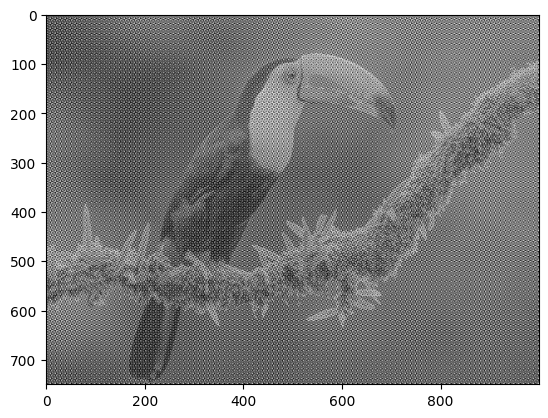

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img = np.array(Image.open('.\\data\\toucan_noise.jpg'))
plt.imshow(img, cmap='gray')

# YOUR CODE HERE

- Чтобы избежать так называемой ошибки перехлеста, которая возникает из-за периодичности дискретного преобразования Фурье (подробности см. Гонсалес, п. 4.6.6), перед фильтрацией необходимо дополнить изображение нулями.

    Реализуйте функцию `get_expand_img()`, возвращающую изображение, дополненное нулями. Его новый размер положим равным $P=2M$ и $Q=2N$. Центрировать изображение необязательно.

In [2]:
# Отобразите получившееся после использования функции изображение

# YOUR CODE HERE

- Для фильтрации существует множество разных фильтров. В этом задании нам потребуется *гауссовское ядро*. В одномерном случае оно задается формулой:
    $$h_{gauss}(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-x^2/2\sigma^2}.$$
    В двумерном случае справедлива формула:
    $$h_{gauss}(x, y) = h_{gauss}(x)h_{gauss}(y)$$

    Реализуйте функцию `gauss_kernel()`. На вход: размер ядра и среднеквадратическое отклонение $\sigma$. Возвращает функция гауссово ядро. Размер ядра фильтра должен быть равен $P \times Q$.

In [3]:
# Выведите ядро фильтра любого размера в качестве примера

# YOUR CODE HERE
print("Gauss kernel: ", )

Gauss kernel: 


- Наконец, вычислите Фурье-образы изображения и ядра фильтра, перемножьте их в частотной области и с помощью обратного преобразования Фурье получите обработанное изображение. Из-за использования расширения на предыдущем шаге необходимо будет вырезать нужную область, содержащую изображение. 

    Осуществите все эти шаги в функции `get_filtered_image()`, которая принимает на вход расширенные изображение и пространственный фильтр и возвращает отфильтрованное изображение. На картинке не должно остаться исходного шума.

In [4]:
# Отобразите изображение после фильтрации

# YOUR CODE HERE

## Фильтр верхних частот. Повышение резкости изображения.

В этой части задания необходимо воспользоваться фильтром верхних частот (ФВЧ) для повышения резкости изображения Европы, спутника Юпитера.

Источник: https://europa.nasa.gov/resources/29/europas-stunning-surface/

In [5]:
# Загрузите и отобразите картинку
img_path = '.\\data\\europa_blur.jpg'

# YOUR CODE HERE

- В качестве ФВЧ будем использовать **фильтр Баттерворта**. Его передаточная функция в частотной области имеет вид:
$$
H(k_x, k_y) = \frac{1}{1+ [D_0/D(k_x, k_y)]^{2n}},
$$
где $n$ - порядок фильтра, $D_0$ - частота среза, $D(k_x, k_y) = \left[(k_x-\frac{P}{2})^2 + (k_y-\frac{Q}{2})^2\right]^{1/2}   $ - расстояние от начала координат в частотной области до точки $(k_x, k_y)$.

Функция `high_pass_kernel()` должная принимать размер фильтра, значение частоты среза и порядок.


In [6]:
# Выведите ядро фильтра любого размера в качестве примера

# YOUR CODE HERE
print("Butterworth kernel: ", )

Butterworth kernel: 


- Процесс фильтрации абсолютно такой же, как и в случае использования ФНЧ: дополните изображение нулями, сформируйте цифровой фильтр, перемножьте фурье образы и получите отфильтрованное изображение.

*Обратите внимание*: фильтр Баттерворта сразу задан в частотной области, поэтому будьте внимательны с правильным центрированием фильтра и изображения

Можете дополнить уже написанные функции или произвести расчеты в ячейке ниже. Подберите параметры фильтра так, чтобы стало лучше видно трещины на поверхности спутника.

In [7]:
# YOUR CODE HERE

## Нелинейные фильтры

Линейные фильтры хорошо работают не для всех моделей шума. Рассмотрим *импульсный шум*, который встречается, например, при работе электронных утройств и связан с дискретной природой заряженных частиц. В контексте изображений он проявляет себя как наличие случайно разбросанных пикселей с очень большим значением.

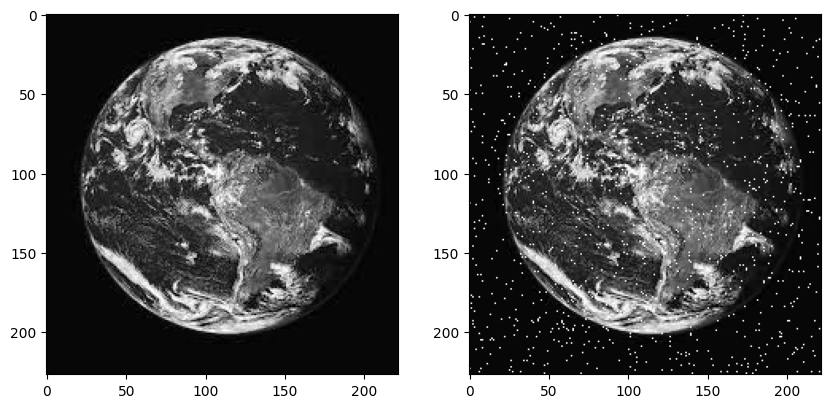

In [8]:
# Пример дробового шума на изображении
import IPython
IPython.display.Image('.\\data\\impulse_noise_example.png', width=700)

- Реализуйте функцию `get_img_with_impulse_noise()`, которая принимает на вход изображение и параметр `ratio`, отвечающий за долю пикселей, которые должны принять большое значение. Возвращает функция зашумленную картинку.

    Присвойте $5\%$ пикселей значение, соответствующее белому цвету в grayscale режиме, затем отобразите картинку.

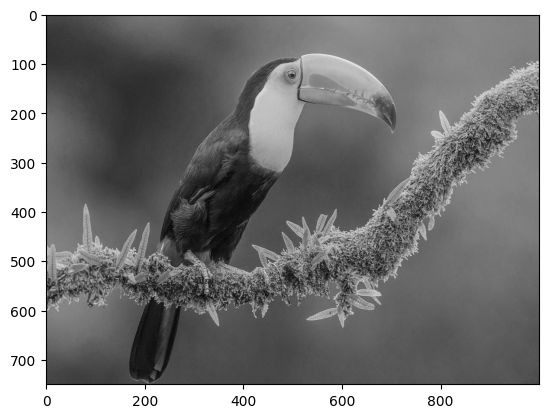

In [9]:
img = np.array(Image.open('.\\data\\toucan.jpeg'))
plt.imshow(img, cmap='gray')

# YOUR CODE HERE

Теперь у нас есть картинка с импульсным шумом. Чтобы от него избавиться, воспользуемся **медианным фильтром** - это нелинейный фильтр, в котором каждый выходной пиксель получается вычислением медианы по всем соседям соответствующего входного пикселя (в случае окна $3\times 3$).

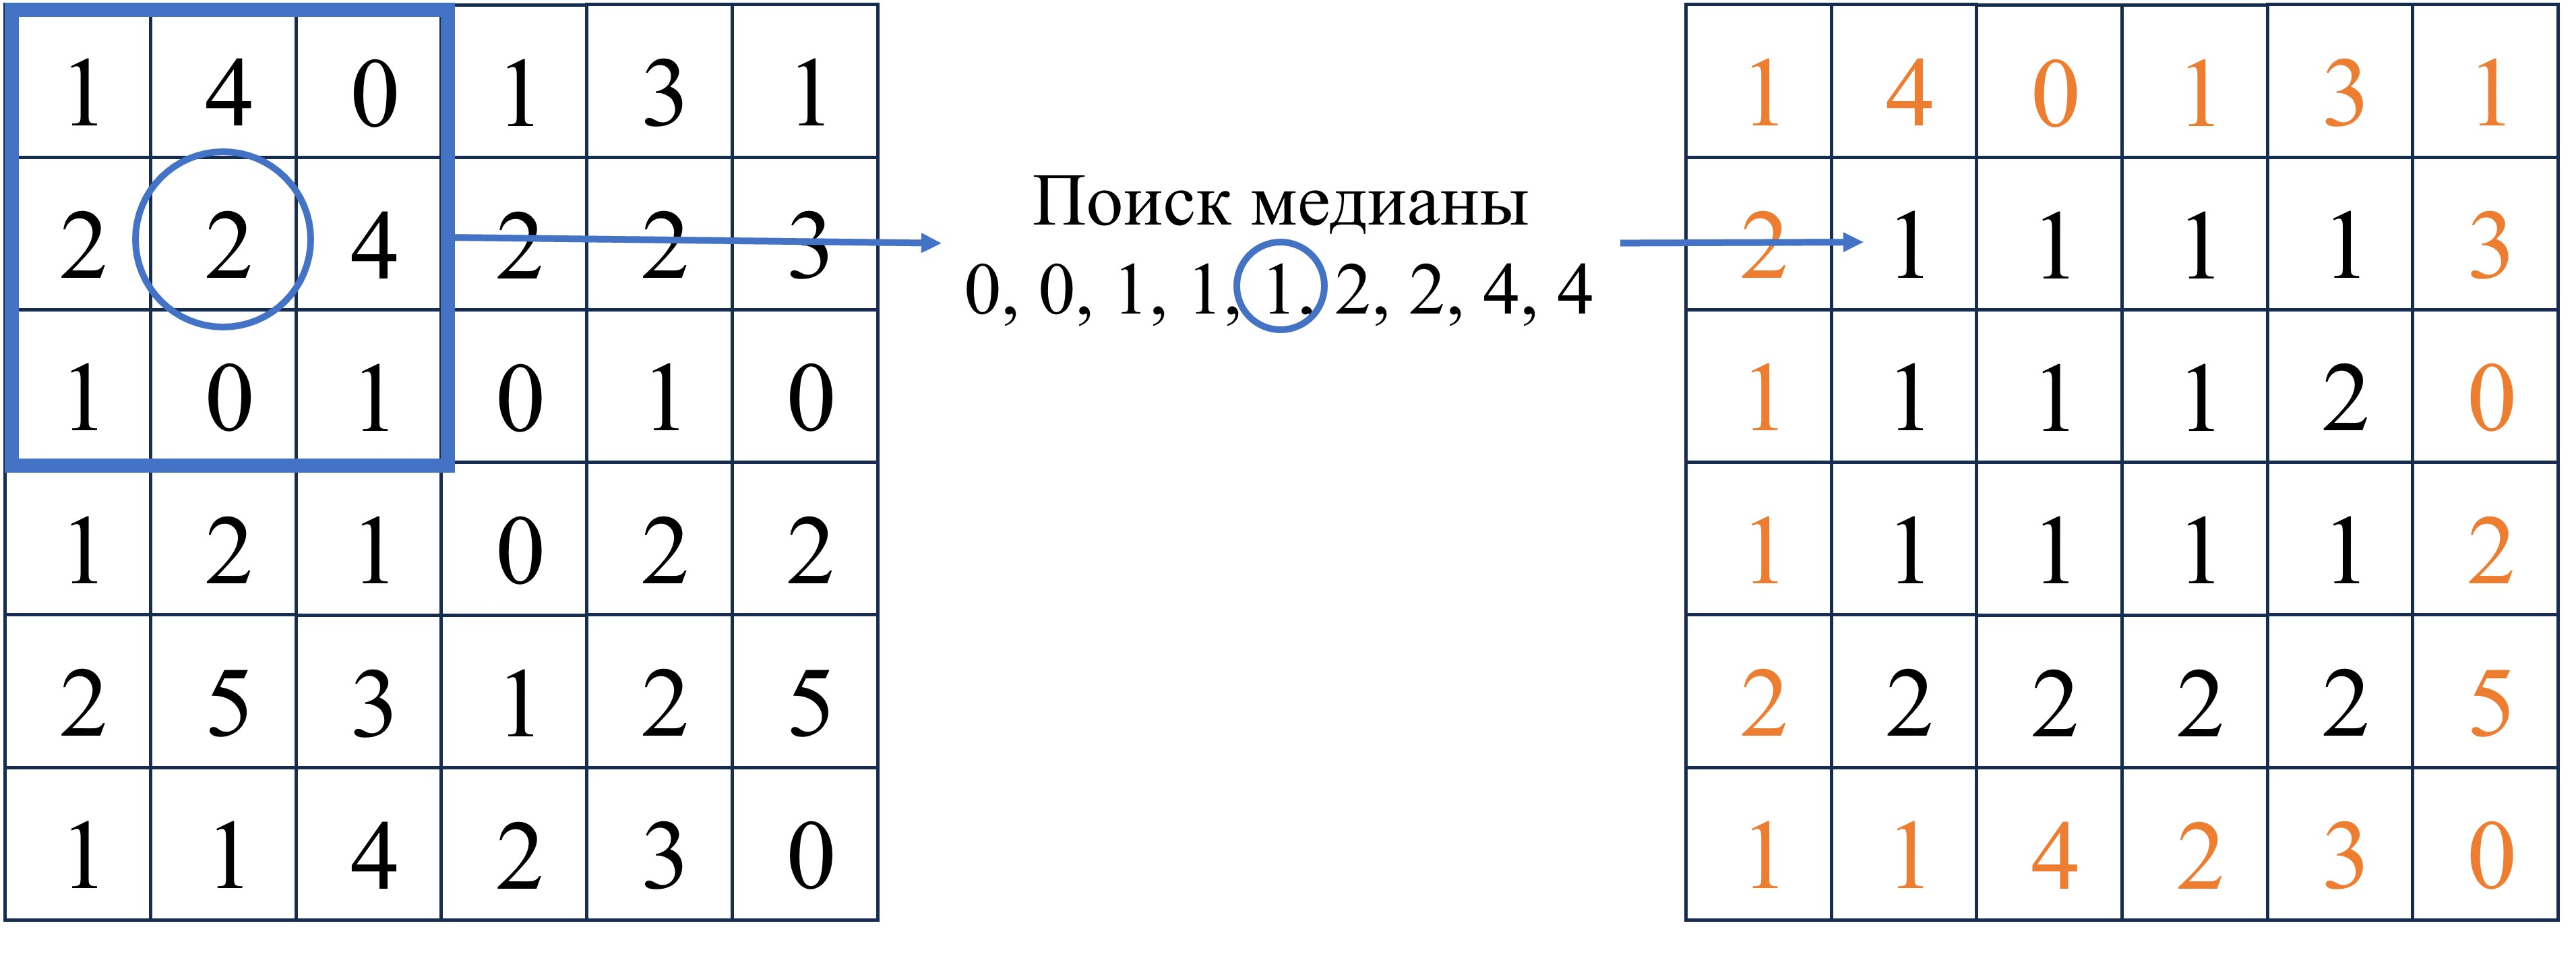

In [10]:
# Медианный фильтр 3x3 с сохранением граничных значений
IPython.display.Image('data/median_filter.jpg', width=900)

- Реализуйте функцию `median_filter()`, принимающую на вход картинку и размер окна для нахождения медианы. Отфильруйте изображение с помощью окна $3\times 3$. Значения на границе оставьте неизменными.

In [11]:
# YOUR CODE HERE

## **Перед отправкой сохраните файлы в следующем формате: 01_Фамилия.ipynb и filtering_funcs.py**